# [Kaggle Tutorial] Data Analysis for Titanic 

Kaggle의 가장 기본적인 튜토리얼입니다. kaggle의 초보자분들은 이 튜토리얼을 통해 시작하시는 것을 추천드립니다.

- ⭐ **Goal** : 타이타닉에서 살아남은 승객의 수를 예측하는 모델 만들기

---

## 1. Import Library

데이터 분석에 필요한 라이브러리를 불러옵니다.

In [1]:
import os

# Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Visualization
import seaborn as sns
import missingno as msno

import warnings

# seaborn의 font scale을 사용하여 graph의 font size를 지정합니다.
plt.style.use('seaborn')
sns.set(font_scale=2.5)

# ignore warnings
warnings.filterwarnings('ignore')

# 브라우저의 내부에 plot을 그릴 수 있도록 설정합니다.
%matplotlib inline

Machine Learning 도구인 **Scikit-Learn**를 불러옵니다.

- `LogisticRegression` : 데이터가 특정 카테고리에 속해있는지의 여부를 0에서 1의 확률로 예측하는 회귀 알고리즘입니다.
- `SVM(Support Vector Machine)` : 데이터가 특정 카테고리에 속해있는지 여부를 판단해주는 지도학습 모델로, classification이나 logistic regression에 자주 사용됩니다.
- `Random Forest` : 다수의 decision tree(결정트리)를 학습시키는 ensemble machine learning모델입니다.
- `k-nearest neighbors(KNN)` : 어떤 데이터가 주어졌을때, 주변의 데이터(이웃)들과 한 범주로 묶어주는 모델입니다.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split

## 2. Data Analysis

titanic 대회에서 제공하는 csv 형식의 train, test data를 불러옵니다.

`pandas` library를 통해 불러온 데이터들을 살펴보겠습니다.

### 2.1 Read & Check Data

In [3]:
# pandas를 이용하여 데이터를 읽어옵니다.
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [4]:
# head() 함수는 상위 5개의 data를 불러옵니다. 
# head(10)과 같이 원하는 data의 개수를 input으로 준다면, 더 많은 데이터를 불러올 수 있습니다.

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# columns 함수를 사용하면, train dataset의 열에 해당하는 정보들을 불러올 수 있습니다.

train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# data의 (columns, rows)를 불러옵니다.
print("train : ", train.shape, ", test : ", test.shape)

train :  (891, 12) , test :  (418, 11)


In [7]:
# describe() 함수는 data의 columns 별 통계량을 가져옵니다.

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.2 Check the Null Data

In [8]:
# info() 함수는 데이터에 대한 전반적인 정보를 나타냅니다.
## train data에서는 age와 cabin, embarked에 해당하는 정보들 중 NaN이 있는 것을 확인할 수 있습니다.

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# info()함수를 사용하지 않고, 다음과 같은 방b식으로 NaN value를 확인할 수도 있습니다.

for col in test.columns:
    print('{:<15} Percent of NaN value : train - {:.2f} %, test - {:.2f} %'.format(col, 100 * (train[col].isnull().sum() / train[col].shape[0]), 100 * (test[col].isnull().sum() / test[col].shape[0])))

PassengerId     Percent of NaN value : train - 0.00 %, test - 0.00 %
Pclass          Percent of NaN value : train - 0.00 %, test - 0.00 %
Name            Percent of NaN value : train - 0.00 %, test - 0.00 %
Sex             Percent of NaN value : train - 0.00 %, test - 0.00 %
Age             Percent of NaN value : train - 19.87 %, test - 20.57 %
SibSp           Percent of NaN value : train - 0.00 %, test - 0.00 %
Parch           Percent of NaN value : train - 0.00 %, test - 0.00 %
Ticket          Percent of NaN value : train - 0.00 %, test - 0.00 %
Fare            Percent of NaN value : train - 0.00 %, test - 0.24 %
Cabin           Percent of NaN value : train - 77.10 %, test - 78.23 %
Embarked        Percent of NaN value : train - 0.22 %, test - 0.00 %


missingno 라이브러리를 사용하면 null의 분포를 더 쉽게 확인할 수 있습니다.

<AxesSubplot:>

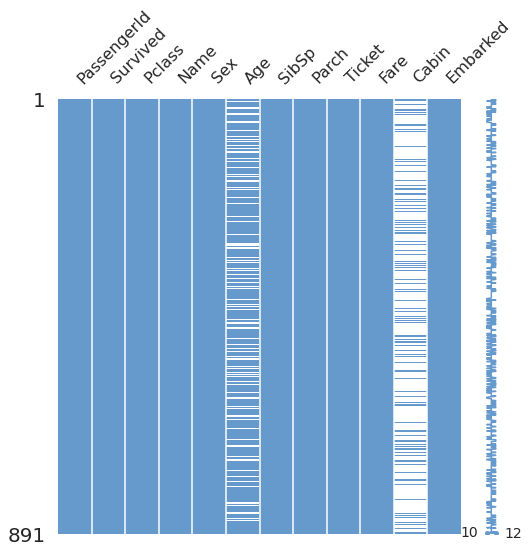

In [10]:
msno.matrix(df=train.iloc[:, :], figsize=(8, 8), color=(0.4, 0.6, 0.8))

<AxesSubplot:>

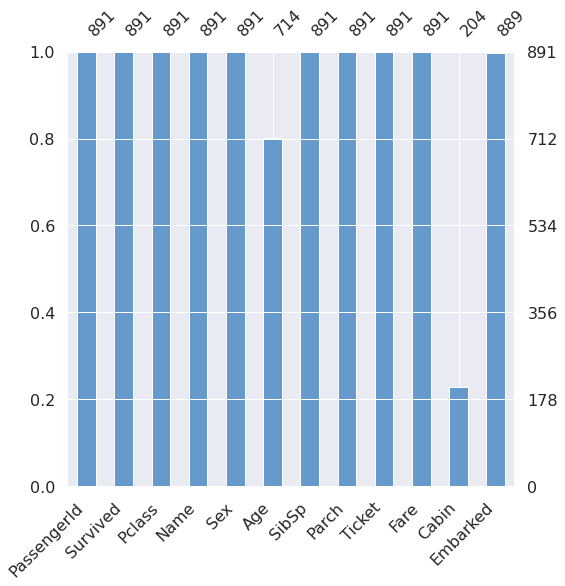

In [11]:
msno.bar(df=train.iloc[:, :], figsize=(8, 8), color=(0.4, 0.6, 0.8))

### 2.3 Count the rate of Survival 

타이타닉 승객 중 61.6%의 인원만이 살아남았습니다.

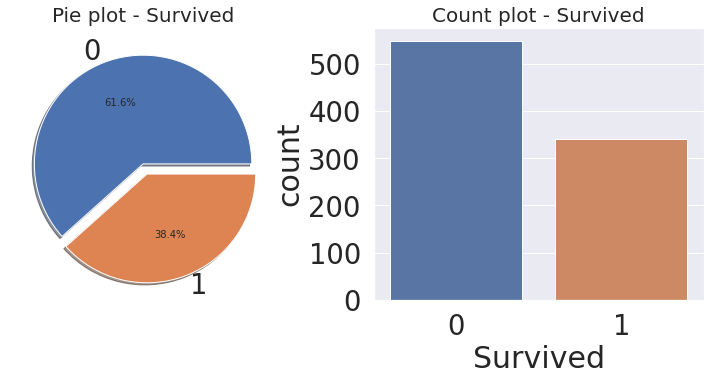

In [12]:
f, ax = plt.subplots(1, 2, figsize=(13, 5))

train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived', fontsize = 20)
ax[0].set_ylabel('')

sns.countplot('Survived', data=train, ax=ax[1])
sns.set(font_scale = 0.3)
ax[1].set_title('Count plot - Survived', fontsize = 20)

plt.show()

## 3. Exploratory Data Analysis (EDA)

`Pclass`, `Name`, `Sex`, `Age`, `SibSp`, `Parch`, `Ticket`, `Fare`, `Cabin`, `Embarked` 의 feature들을 살펴본 후, 이 중 쓸모있는 데이터들을 정제합시다.

### 3.1 Pclass

`Pclass`(ex. 1,2,3등석)에 따른 생존률을 확인합니다.

In [13]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
pd.crosstab(train['Pclass'], train['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Pclass 별 승객의 수와, 생존자의 수를 나타내면 다음과 같습니다.

- 좋은 Pclass에 탑승할 수록 생존할 확률이 높은 것을 확인할 수 있습니다.

성별에 대한 data를 one-hot encoding 해줍니다.

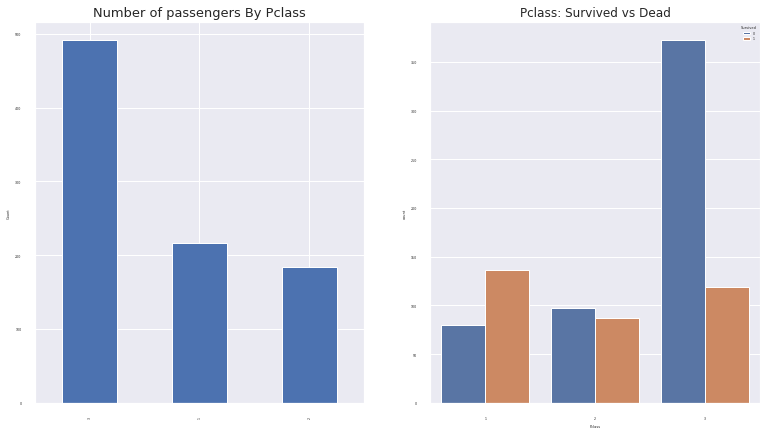

In [15]:
f, ax = plt.subplots(1, 2, figsize= (13,7))

train["Pclass"].value_counts().plot.bar(ax = ax[0])
ax[0].set_title("Number of passengers By Pclass", fontsize = 13)
ax[0].set_ylabel("Count")

# using seaborn
sns.countplot("Pclass", hue = "Survived", data = train, ax = ax[1])
sns.set(font_scale = 1)
ax[1].set_title("Pclass: Survived vs Dead")
plt.show()

`pclass`에 대한 data를 `one-hot encoding` 해줍니다.

In [16]:
Pclass_train = pd.get_dummies(train["Pclass"])
Pclass_test = pd.get_dummies(train["Pclass"])

Pclass_train.columns = ["pclass_1", "pclass_2", "pclass_3"]
Pclass_test.columns = ["pclass_1", "pclass_2", "pclass_3"]

train.drop(["Pclass"], axis = 1, inplace = True)
test.drop(["Pclass"], axis = 1, inplace = True)

train = train.join(Pclass_train)
test = test.join(Pclass_test)

In [17]:
train.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pclass_1,pclass_2,pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


### 3.2 Sex

- 여성의 생존률이 더 높습니다.

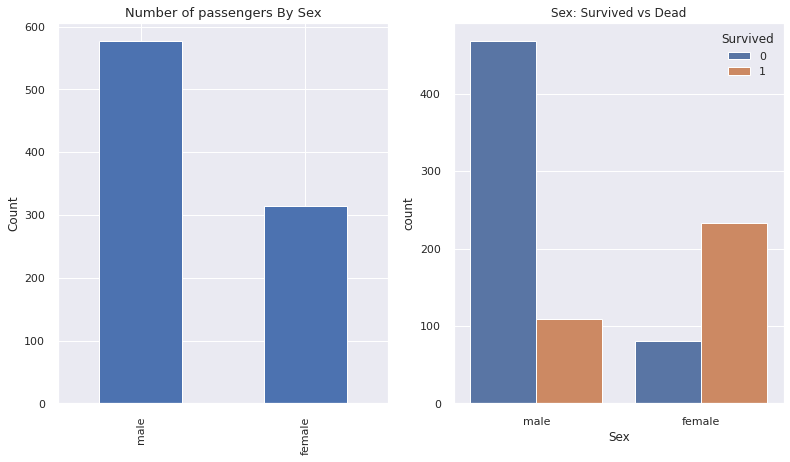

In [18]:
f, ax = plt.subplots(1, 2, figsize= (13,7))

train["Sex"].value_counts().plot.bar(ax = ax[0])
ax[0].set_title("Number of passengers By Sex", fontsize = 13)
ax[0].set_ylabel("Count")

# using seaborn
sns.countplot("Sex", hue = "Survived", data = train, ax = ax[1])
sns.set(font_scale = 1)
ax[1].set_title("Sex: Survived vs Dead")
plt.show()

성별에 대한 data를 `one-hot encoding` 해줍니다. 

In [19]:
sex_train = pd.get_dummies(train["Sex"])
sex_test = pd.get_dummies(train["Sex"])

sex_train.columns = ["Female", "Male"]
sex_test.columns = ["Female", "Male"]

train.drop(["Sex"], axis = 1, inplace = True)
test.drop(["Sex"], axis = 1, inplace = True)

train = train.join(sex_train)
test = test.join(sex_test)

In [20]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pclass_1,pclass_2,pclass_3,Female,Male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


### 3.3 Age

In [21]:
print("The Oldest Passenger : ", train["Age"].max(), " years")
print("The Youngest Passenger : ", train["Age"].min(), " years")
print("Mean of Passenger's Age : {:.2f} years".format(train["Age"].mean()))

The Oldest Passenger :  80.0  years
The Youngest Passenger :  0.42  years
Mean of Passenger's Age : 29.70 years


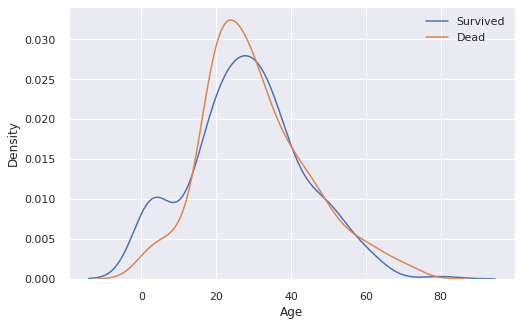

In [22]:
fix, ax = plt.subplots(1, 1, figsize = (8,5))

sns.kdeplot(train[train["Survived"] == 1]["Age"], ax = ax)
sns.kdeplot(train[train["Survived"] == 0]["Age"], ax = ax)

plt.legend(["Survived", "Dead"])
plt.show()

나이 범위에 따른 생존률을 확인해보자.

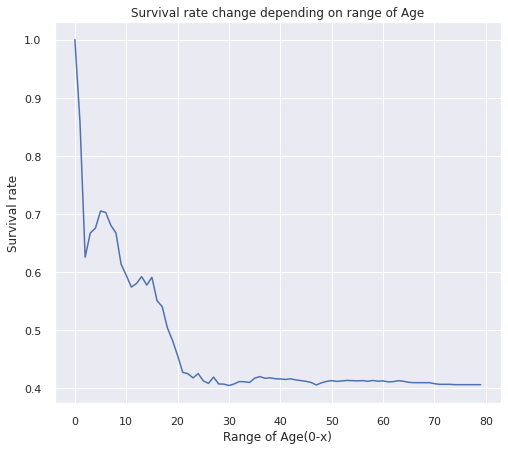

In [23]:
survival_rate = []

for i in range(int(train["Age"].min()), int(train["Age"].max())):
    survival_rate.append( train[ train["Age"] < i + 1]["Survived"].sum() / train[ train["Age"] < i + 1]["Survived"].count() )
    
plt.figure(figsize = (8, 7))
plt.plot(survival_rate)
plt.title("Survival rate change depending on range of Age")
plt.ylabel("Survival rate")
plt.xlabel("Range of Age(0-x)")
plt.show()

`Age` 데이터는 20%정도가 NaN value입니다. 잘 모르는 데이터에 대해서는 평균값으로 채우도록 합시다.

- random이나 medium value로 채울 수도 있고, 이 범주에 대한 데이터를 아예 버려도 됩니다.

In [24]:
print('Percent of NaN value : train - {:.2f} %, test - {:.2f} %'.format(100 * (train["Age"].isnull().sum() / train["Age"].shape[0]), 100 * (test["Age"].isnull().sum() / test["Age"].shape[0])))

Percent of NaN value : train - 19.87 %, test - 20.57 %


In [25]:
train["Age"].fillna(train["Age"].mean(), inplace = True)
test["Age"].fillna(test["Age"].mean(), inplace = True)

### 3.4 Family

`SibSp`(형제, 자매)와 `Parch`(부모님)은 `Family`라는 하나의 카테고리로 묶은 후 처리합니다.

In [26]:
train["Family"] = train["SibSp"] + train["Parch"] + 1 # 1은 본인
test["Family"] = test["SibSp"] + test["Parch"] + 1 

In [27]:
train[["Name", "Family"]].head()

,Name,Family
0,"Braund, Mr. Owen Harris",2
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2
4,"Allen, Mr. William Henry",1


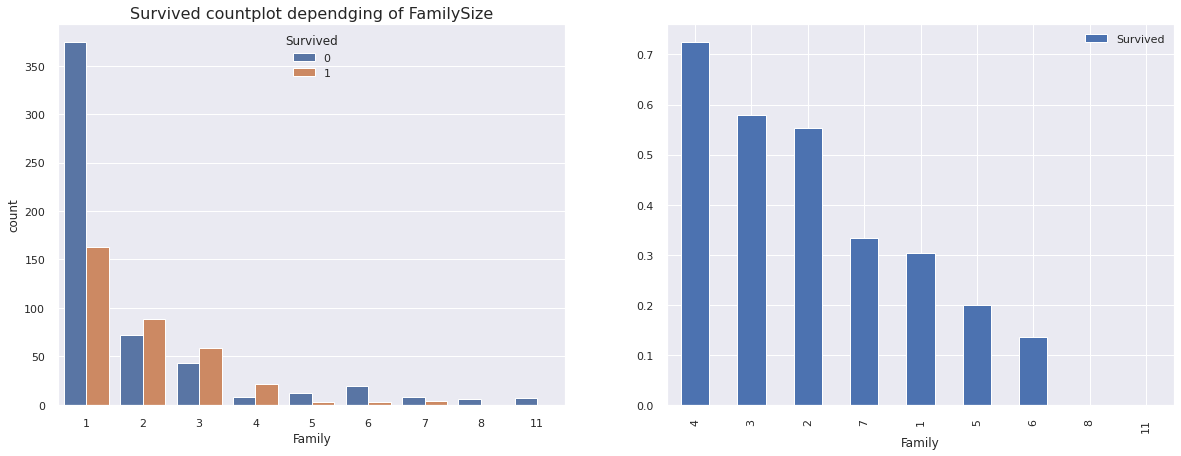

In [28]:
f, ax = plt.subplots(1, 2, figsize = (20,7))

sns.countplot("Family", hue = "Survived", data = train, ax = ax[0])
ax[0].set_title("Survived countplot dependging of FamilySize", fontsize = 16)

train[["Family", "Survived"]].groupby(["Family"], as_index = True).mean().sort_values(by = "Survived", ascending = False).plot.bar(ax = ax[1])

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

### 3.5 Fare

탑승료에 따른 생존률을 확인합니다.

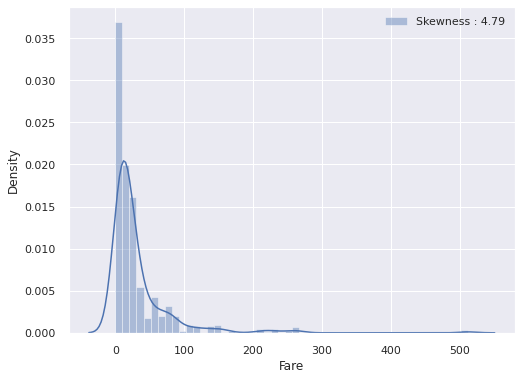

In [29]:
f, ax = plt.subplots(1, 1, figsize = (8,6))

g = sns.distplot(train["Fare"], label = "Skewness : {:.2f}".format(train["Fare"].skew()), ax = ax)
g = g.legend(loc = "best")

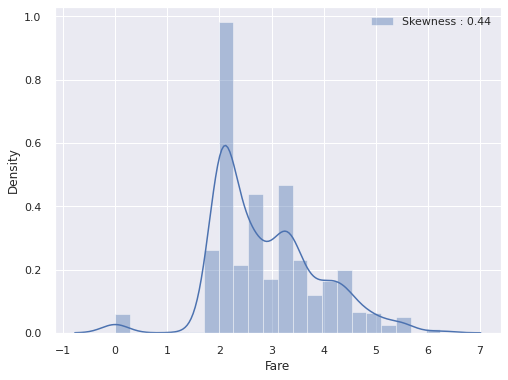

In [30]:
# 위의 Fare 그래프를 보면, 확률분포가 매우 비대칭적입니다. High Skewness
# 확률 분포가 비대칭적이라면, 모델이 잘못 학습될 수도 있으므로 log 함수를 취해줍니다.

train["Fare"] = train["Fare"].map(lambda i : np.log(i) if i > 0 else 0)
test["Fare"] = test["Fare"].map(lambda i : np.log(i) if i > 0 else 0)

# 다시 그래프 그리기

f, ax = plt.subplots(1, 1, figsize = (8,6))
g = sns.distplot(train["Fare"], label = "Skewness : {:.2f}".format(train["Fare"].skew()), ax = ax)
g = g.legend(loc = "best")

탑승료에는 `test` dataset에 하나의 데이터가 비어있습니다. 빈 부분에 대해서는 평균값을 넣어주겠습니다.

In [31]:
test["Fare"].fillna(test["Fare"].mean(), inplace = True)

### 3.6 Cabin

`Cabin` feature는 null의 비율이 매우 높으므로 이를 통해 생존률을 예측하기가 어렵습니다.

따라서 이 데이터는 제거하고 학습을 진행합니다.

In [32]:
train = train.drop(["Cabin"], axis = 1)
test = test.drop(["Cabin"], axis = 1)

### 3.7 Embarked

탑승구에 따른 생존률을 확인합니다.

<AxesSubplot:xlabel='Embarked'>

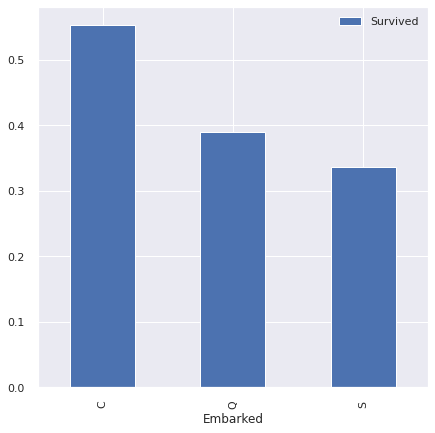

In [33]:
f, ax = plt.subplots(1, 1, figsize = (7,7))

train[["Embarked", "Survived"]].groupby(["Embarked"], as_index = True).mean().sort_values(by = "Survived", ascending = False).plot.bar(ax = ax)

`Embarked`에는 2개의 Null value가 있었습니다. `S` 탑승구에 가장 많은 승객이 있으므로 null value의 `Embarked`는 `S`로 채웠습니다.

In [34]:
train["Embarked"].fillna("S", inplace = True)
test["Embarked"].fillna("S", inplace = True)

또한, 학습이 수월하게 되도록 one-hot encoding을 해줍니다.

In [35]:
embarked_train = pd.get_dummies(train["Embarked"])
embarked_test = pd.get_dummies(train["Embarked"])

embarked_train.columns = ["embarked_s", "embarked_c", "embarked_q"]
embarked_test.columns = ["embarked_s", "embarked_c", "embarked_q"]

train.drop(["Embarked"], axis = 1, inplace = True)
test.drop(["Embarked"], axis = 1, inplace = True)

train = train.join(embarked_train)
test = test.join(embarked_test)

이제 필요한 데이터만을 남기고 버리도록 합시다. 성별도 female과 male 둘 중 하나만 남깁니다.

In [36]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,pclass_1,pclass_2,pclass_3,Female,Male,Family,embarked_s,embarked_c,embarked_q
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,1.981001,0,0,1,0,1,2,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.266662,1,0,0,1,0,2,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.070022,0,0,1,1,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.972177,1,0,0,1,0,2,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,2.085672,0,0,1,0,1,1,0,0,1


In [37]:
train.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Male"], axis = 1, inplace = True)
test.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Male"], axis = 1, inplace = True)

In [38]:
train.head()

,Survived,Age,Fare,pclass_1,pclass_2,pclass_3,Female,Family,embarked_s,embarked_c,embarked_q
0,0,22.0,1.981001,0,0,1,0,2,0,0,1
1,1,38.0,4.266662,1,0,0,1,2,1,0,0
2,1,26.0,2.070022,0,0,1,1,1,0,0,1
3,1,35.0,3.972177,1,0,0,1,2,0,0,1
4,0,35.0,2.085672,0,0,1,0,1,0,0,1


## 4. Building Machine Learning Model & Prediction using the Trained Model

Titanic problem은 생존률을 0이나 1로 예측하는 binary classification 문제입니다. 따라서 training dataset의 여러 feature들을 이용하여 `survived` 여부를 파악하도록 합시다.

### 4.1 Preparation - Split dataset into train, valid, test set

우선 학습에 사용할 데이터에서 target label(`Survived`)만을 분리합니다.

In [39]:
# train data에서 target에 해당되는 생존률을 train_target 변수에 미리 저장합니다.
train_target = train["Survived"].values
train_data = train.drop("Survived", axis = 1).values

In [40]:
# dataframe 형식으로 되어있는 test를 list로 변환합니다.
test_value = test.values
print(test_value)

[[34.5         2.05786033  0.         ...  0.          0.
   1.        ]
 [47.          1.94591015  1.         ...  1.          0.
   0.        ]
 [62.          2.27083639  0.         ...  0.          0.
   1.        ]
 ...
 [38.5         1.98100147  0.         ...  0.          0.
   1.        ]
 [30.27259036  2.08567209  0.         ...  0.          0.
   1.        ]
 [30.27259036  3.10719762  0.         ...  0.          0.
   1.        ]]


sklearn의 `train_test_split`함수를 사용하여 train dataset과 valid dataset을 나눠줍니다. 
이때 valid의 비율은 30%로 설정하겠습니다.

In [41]:
data_train, data_valid, target_train, target_valid = \
        train_test_split(train_data, train_target, test_size = 0.3, random_state = 2018)

### 4.2 Model generation and prediction

1. Logistic Regression

In [42]:
logistic_regression = LogisticRegression()
logistic_regression.fit(data_train, target_train)
prediction = logistic_regression.predict(data_valid)

In [43]:
print("총 {}명 중 {:.2f}%의 정확도로 생존을 맞춤".format(target_valid.shape[0], 100 * metrics.accuracy_score(prediction, target_valid)))

총 268명 중 84.33%의 정확도로 생존을 맞춤


2. Support Vector Machine

In [44]:
svc = SVC()
svc.fit(data_train, target_train)
prediction = svc.predict(data_valid)

In [45]:
print("총 {}명 중 {:.2f}%의 정확도로 생존을 맞춤".format(target_valid.shape[0], 100 * metrics.accuracy_score(prediction, target_valid)))

총 268명 중 66.04%의 정확도로 생존을 맞춤


3. K-nearest Neighborhood

In [46]:
knn = KNeighborsClassifier()
knn.fit(data_train, target_train)
prediction = knn.predict(data_valid)

In [47]:
print("총 {}명 중 {:.2f}%의 정확도로 생존을 맞춤".format(target_valid.shape[0], 100 * metrics.accuracy_score(prediction, target_valid)))

총 268명 중 76.87%의 정확도로 생존을 맞춤


4. Random Forest 

In [48]:
random_forest = RandomForestClassifier()
random_forest.fit(data_train, target_train)
prediction = random_forest.predict(data_valid)

In [49]:
print("총 {}명 중 {:.2f}%의 정확도로 생존을 맞춤".format(target_valid.shape[0], 100 * metrics.accuracy_score(prediction, target_valid)))

총 268명 중 83.96%의 정확도로 생존을 맞춤


### 4.3 Feature Importance

어떤 feature가 model에 영향을 많이 줬는지 확인해봅시다. `random_forest` model에서는 `Age` feature가 model에 가장 큰 영향을 줌을 확인할 수 있습니다.

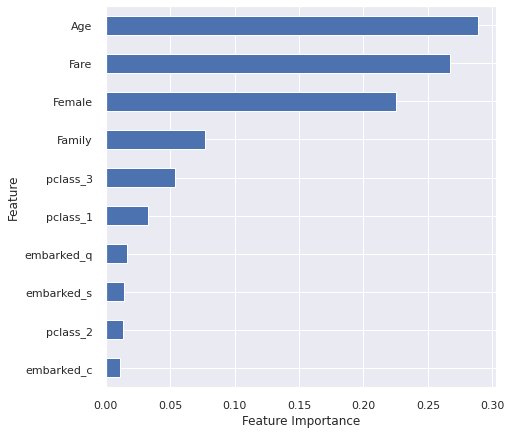

In [50]:
from pandas import Series

feature_importance = random_forest.feature_importances_
series_feature_importance = Series(feature_importance, index = test.columns)

plt.figure(figsize = (7,7))
series_feature_importance.sort_values(ascending = True).plot.barh()
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

### 4.4 Prediction on Test set 

- 지금까지의 모델 중 logistic regression이 가장 좋은 성능을 내었습니다.
- 따라서 logistic regression model을 제출하도록 하겠습니다.

In [51]:
submission = pd.read_csv("../input/titanic/gender_submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [52]:
prediction = logistic_regression.predict(test_value)
submission['Survived'] = prediction
submission.to_csv('./my_first_submission.csv', index=False)